In [53]:
import phrt_opt
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

In [54]:
# Problem initialization

num_beams = 10
num_measurements = 100

# Transmission matrix
tm = np.random.randn(num_measurements, num_beams) + 1j * np.random.randn(num_measurements, num_beams)

# Solution vector
x = np.exp(1j * np.random.uniform(-np.pi, np.pi, size=(num_beams, 1)))

# Measurements vector
b = np.abs(tm.dot(x))

In [55]:
# Basic usage of the algorithm

x_hat = phrt_opt.methods.alternating_projections(tm, b)

q = phrt_opt.metrics.quality_norm(x, x_hat)
print(f"Problem was solved with quality tolerance: %.3e" % q)

Problem was solved with quality tolerance: 6.290e-08


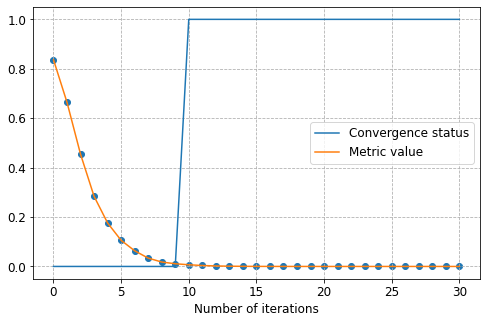

In [124]:
# Algorithm usage with callbacks

tol = 1e-3
max_iter = 30
metric = phrt_opt.metrics.quality_norm

callbacks = [
    phrt_opt.callbacks.ConvergenceCallback(metric, tol),
    phrt_opt.callbacks.MetricCallback(x, metric),
]

x_hat, info = phrt_opt.methods.alternating_projections(
    tm, b,
    tol=tol,
    max_iter=max_iter,
    metric=metric,
    callbacks=callbacks,
)

plt.figure(figsize=(8, 5))

plt.plot(info['cinfo'][:, 0], label="Convergence status")

plt.plot(info['cinfo'][:, 1], label="Metric value")
plt.scatter(np.arange(max_iter + 1), info['cinfo'][:, 1])
plt.xlabel("Number of iterations")
plt.legend()
plt.grid(True, linestyle='--')
plt.show()